<a href="https://colab.research.google.com/github/Annszy1130/Currency_Model_LSTM__Amazon/blob/main/Currency_Model_LSTM__Amazon(1)_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U tensorflow

In [ ]:
import tensorflow as tf #importowanie wymaganych bibliotek
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/integrated_data_Amazon.csv')#wczytanie pliku

In [ ]:
data.shape  #ilość wierszy i kolumn przed czyszczeniem

(404, 35)

In [ ]:
data.columns[data.isnull().any()].tolist()   #wyświetlenie wszystkich kolumn w których wystąpują jakiekolwiek NaN

[]

In [ ]:
data.columns[data.isnull().sum() > 100].tolist()   #wyświetlenie wszystkich kolumn w których występują NaN powyżej 100

[]

In [ ]:
procenty = [i for i in data.columns if data[i].isnull().sum() > 0.30*len(data)]  #możemy także sprawdzić wszystki kolumny, które posiadają powyżej 30% NaN
print(procenty)

[]


In [ ]:
data.info()  # im mniejsza ilość w Non-Null Count tym więcej NaN w danej kolumnie, zgadza się z tym co wyciągneliśmy za pomocą 2 kodów powyżej

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  404 non-null    object 
 1   Otwarcie              404 non-null    float64
 2   Najwyzszy             404 non-null    float64
 3   Najnizszy             404 non-null    float64
 4   Zamkniecie            404 non-null    float64
 5   Wolumen               404 non-null    int64  
 6   Otwarcie_amzn_us_w    404 non-null    float64
 7   Najwyzszy_amzn_us_w   404 non-null    float64
 8   Najnizszy_amzn_us_w   404 non-null    float64
 9   Zamkniecie_amzn_us_w  404 non-null    float64
 10  Wolumen_amzn_us_w     404 non-null    int64  
 11  Otwarcie_baba_us_w    404 non-null    float64
 12  Najwyzszy_baba_us_w   404 non-null    float64
 13  Najnizszy_baba_us_w   404 non-null    float64
 14  Zamkniecie_baba_us_w  404 non-null    float64
 15  Wolumen_baba_us_w     4

In [ ]:
print("Dane przed usunięciem NaN:",len(data), "liczba kolumn:",len(data.columns))#wyświetlenie liczby rekordów i kolumn
data['Zamkniecie'] = data['Zamkniecie'].shift(-1)#przesunięcie kolumny prognowanej o jeden indeks - prognoza ma być na nastęną sesję - można zmienić i prognozować na większą liczbę sesji do przodu
data = data.dropna()#usunięcie danych Not a number
print("Dane po usunięciu NaN:",len(data), "liczba kolumn:",len(data.columns))

Dane przed usunięciem NaN: 404 liczba kolumn: 35
Dane po usunięciu NaN: 403 liczba kolumn: 35


In [ ]:
data.columns[data.isnull().any()].tolist()   #możemy jeszcze raz sprawdzić, czy jakakolwiek kolumna zawiera wartości NaN

[]

In [ ]:
data.head() #wyświetlenie nagłówka tabeli, aby sprawdzić poprawność poprzednich operacji na danych

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Otwarcie_amzn_us_w,Najwyzszy_amzn_us_w,Najnizszy_amzn_us_w,Zamkniecie_amzn_us_w,...,Wolumen_xrt_us_w,Otwarcie_usd_i_w,Najwyzszy_usd_i_w,Najnizszy_usd_i_w,Zamkniecie_usd_i_w,Otwarcie_^ndx_w,Najwyzszy_^ndx_w,Najnizszy_^ndx_w,Zamkniecie_^ndx_w,Wolumen_^ndx_w
0,2014-09-21,16.5455,16.6380,15.9500,16.1605,417462700,16.5455,16.6380,15.9500,16.5660,...,12967898,60.012,60.309,59.609,60.206,4070.07,4118.91,4009.98,4100.09,1822398276
1,2014-09-28,16.4245,16.4745,15.8820,16.1370,293784320,16.4245,16.4745,15.8820,16.1605,...,16728578,60.241,60.561,59.832,60.544,4091.57,4096.25,4007.67,4053.72,1564068965
2,2014-10-05,16.0250,16.2580,15.5655,15.5695,285136800,16.0250,16.2580,15.5655,16.1370,...,21026942,60.562,61.506,60.420,61.436,4010.00,4070.08,3934.94,4027.31,1757568965
3,2014-10-12,16.1750,16.2065,15.5690,15.1820,307794420,16.1750,16.2065,15.5690,15.5695,...,29753242,61.454,61.494,60.354,60.954,4040.74,4048.70,3870.85,3870.85,1969172414
4,2014-10-19,15.4935,15.6600,14.6915,14.3530,444824860,15.4935,15.6600,14.6915,15.1820,...,37441823,60.900,61.320,60.410,60.640,3866.89,3893.62,3700.27,3815.47,2219775862


In [ ]:
data.describe()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Otwarcie_amzn_us_w,Najwyzszy_amzn_us_w,Najnizszy_amzn_us_w,Zamkniecie_amzn_us_w,Wolumen_amzn_us_w,...,Wolumen_xrt_us_w,Otwarcie_usd_i_w,Najwyzszy_usd_i_w,Najnizszy_usd_i_w,Zamkniecie_usd_i_w,Otwarcie_^ndx_w,Najwyzszy_^ndx_w,Najnizszy_^ndx_w,Zamkniecie_^ndx_w,Wolumen_^ndx_w
count,403.000000,403.000000,403.000000,403.000000,4.030000e+02,403.000000,403.000000,403.000000,403.000000,4.030000e+02,...,4.030000e+02,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,4.030000e+02
mean,83.262422,85.939752,80.977055,83.776241,3.965544e+08,83.262422,85.939752,80.977055,83.545263,3.965544e+08,...,2.456640e+07,69.502923,70.064388,68.958369,69.527848,7916.007878,8069.672762,7769.585538,7940.642048,2.151976e+09
std,51.880298,53.600520,50.279699,51.741702,1.602794e+08,51.880298,53.600520,50.279699,51.833597,1.602794e+08,...,1.035472e+07,3.324365,3.370954,3.280984,3.297433,3632.618880,3716.943855,3545.743076,3637.645185,8.543298e+08
min,14.285000,15.075000,14.200000,14.353000,1.373516e+08,14.285000,15.075000,14.200000,14.353000,1.373516e+08,...,7.113069e+06,60.012000,60.309000,59.609000,60.206000,3787.230000,3893.620000,3700.270000,3815.470000,8.570448e+08
25%,37.871250,38.563500,36.967500,37.877000,2.840781e+08,37.871250,38.563500,36.967500,37.809000,2.840781e+08,...,1.743425e+07,67.132150,67.627350,66.518500,67.143450,4745.295000,4820.310000,4679.475000,4745.660000,1.595529e+09
50%,80.200000,83.713000,79.250000,81.311500,3.563967e+08,80.200000,83.713000,79.250000,81.040000,3.563967e+08,...,2.279355e+07,69.927500,70.598900,69.466200,69.907800,6941.260000,7022.970000,6756.540000,6949.010000,1.820053e+09
75%,122.400500,125.915000,118.045000,122.234000,4.793654e+08,122.400500,125.915000,118.045000,122.234000,4.793654e+08,...,3.042311e+07,71.940950,72.332700,71.368900,71.935800,9929.775500,10369.722500,9790.318000,10175.265000,2.599450e+09
max,187.200000,188.654000,178.523000,185.967000,1.045282e+09,187.200000,188.654000,178.523000,185.967000,1.045282e+09,...,9.793681e+07,77.874000,78.463500,75.723200,77.332900,16644.770000,16764.860000,16317.260000,16573.344000,5.164104e+09


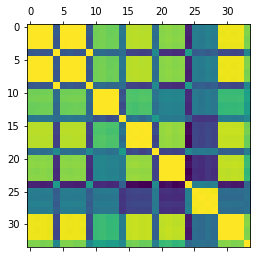

In [ ]:
plt.matshow(data.corr())

In [ ]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

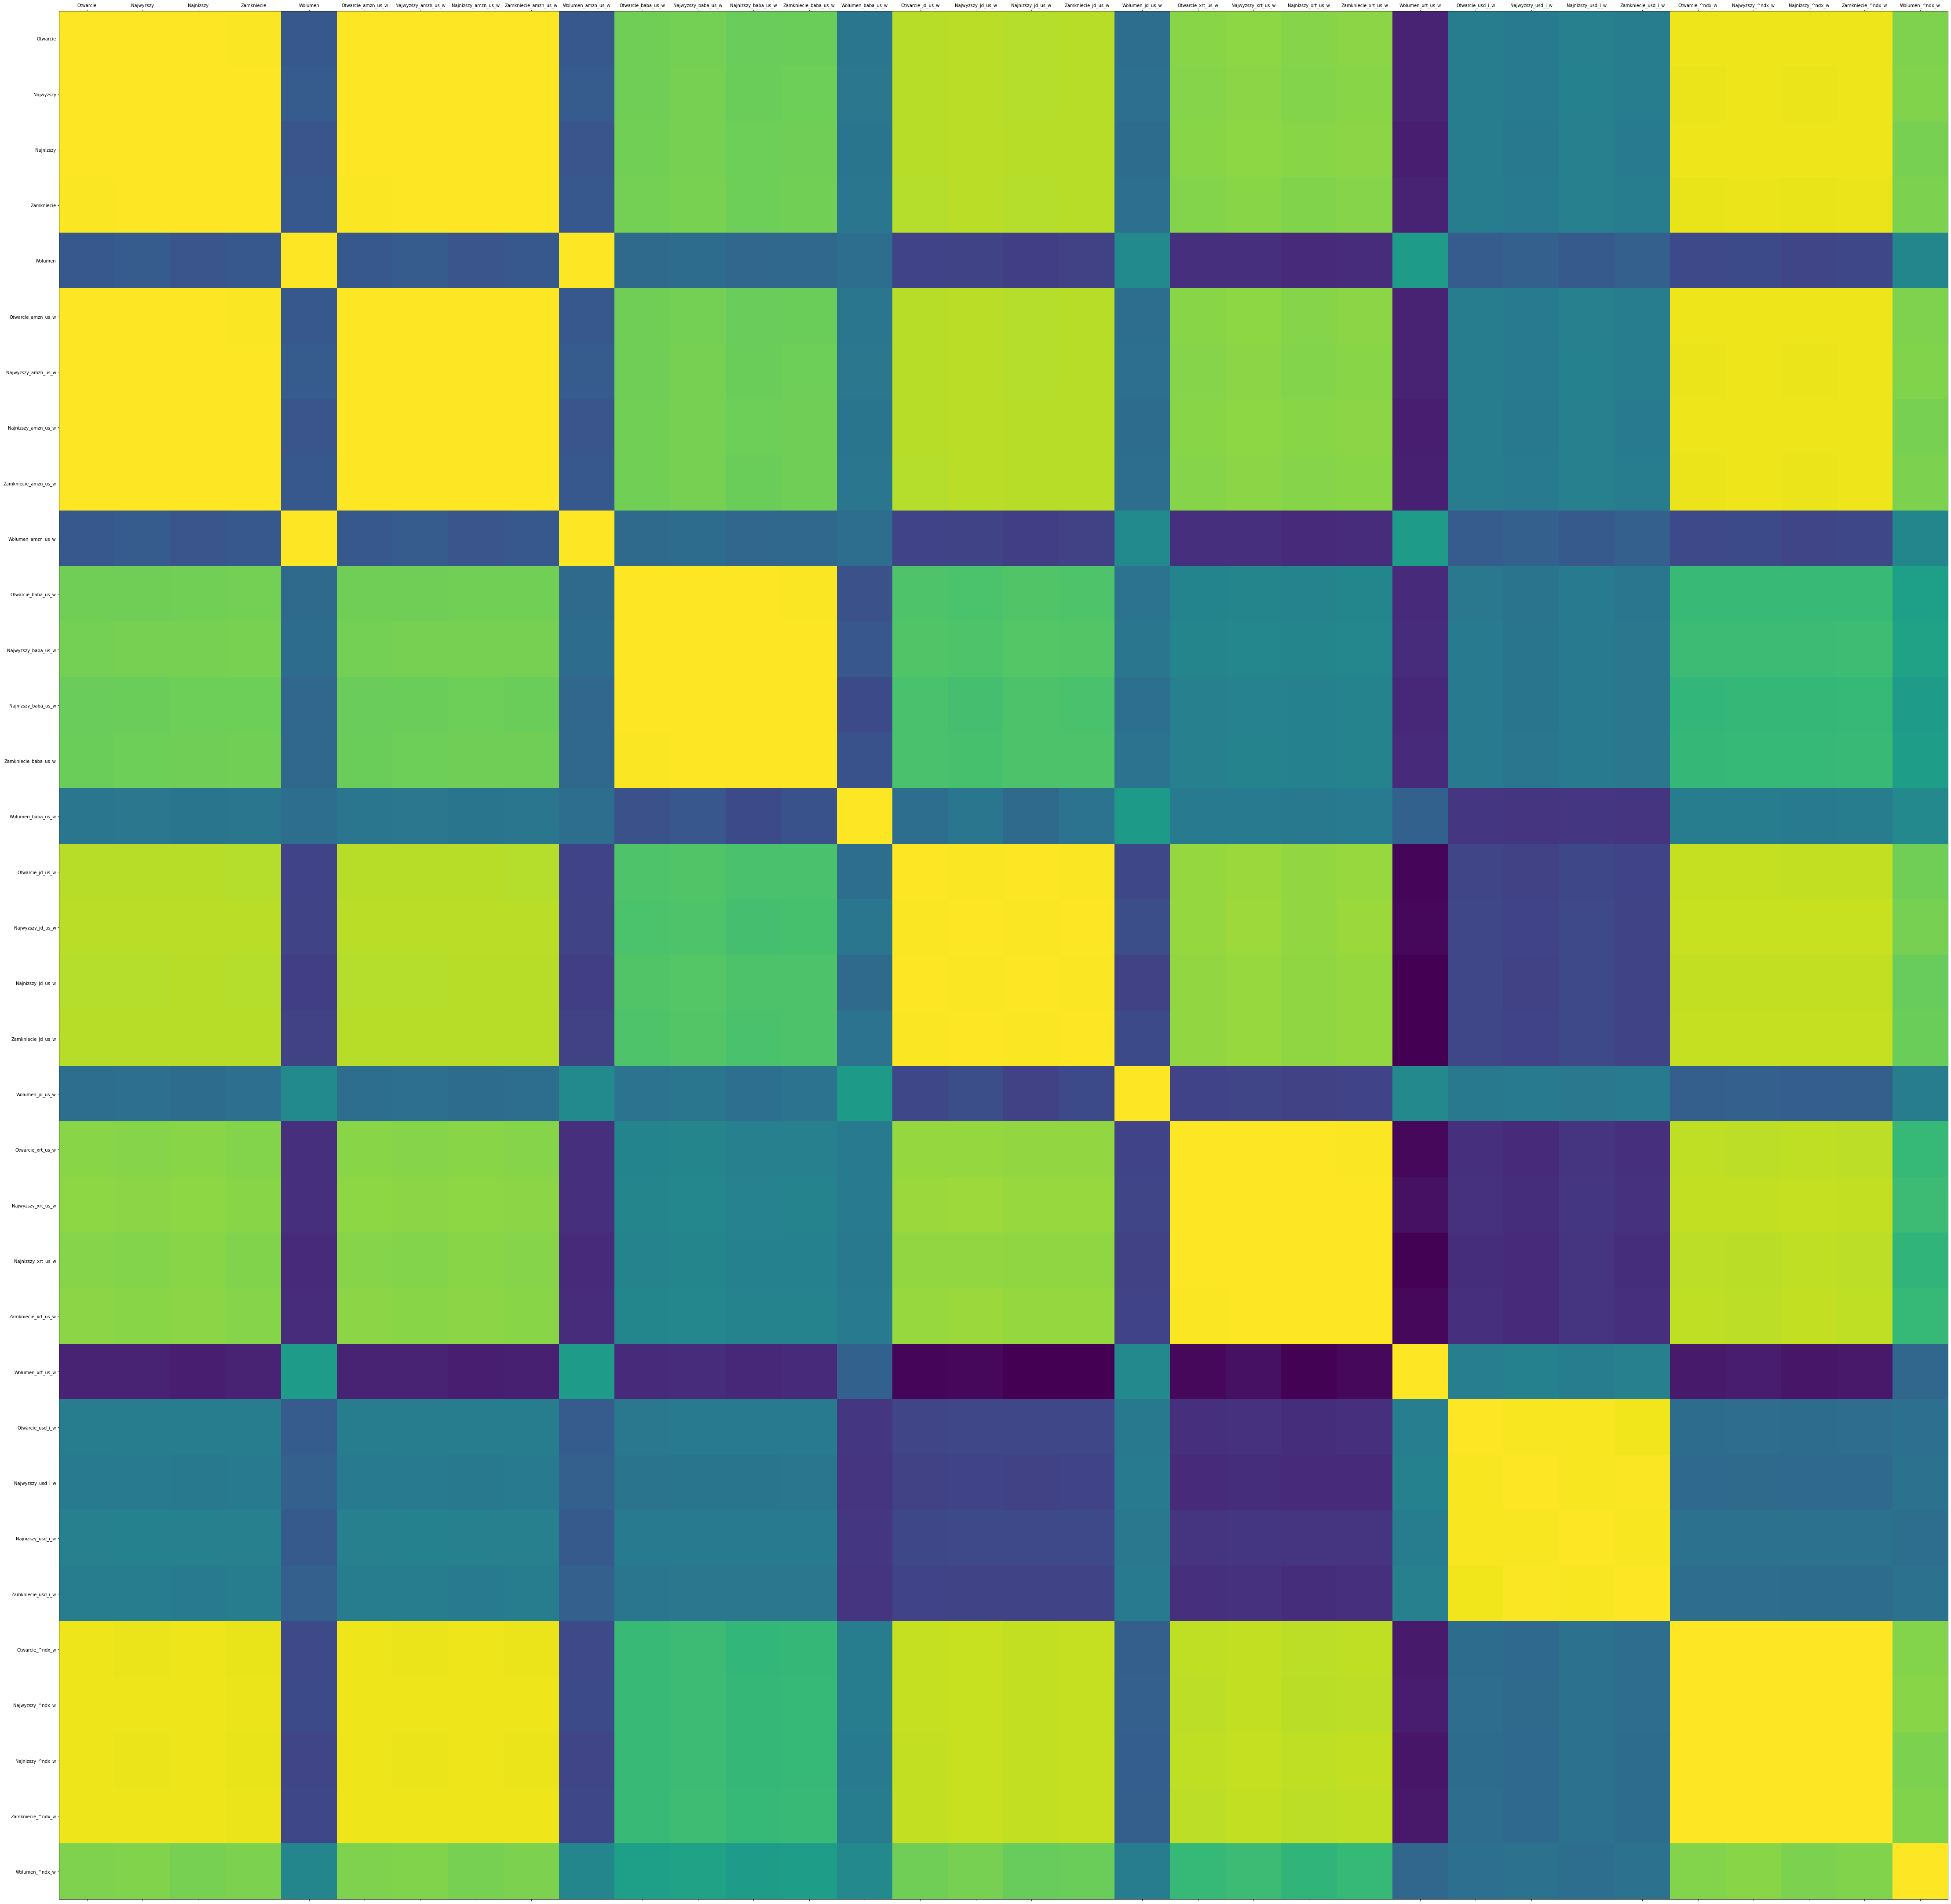

In [ ]:
plot_corr(data,79)

In [ ]:
corr = data.corr()
corr.style.background_gradient()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Otwarcie_amzn_us_w,Najwyzszy_amzn_us_w,Najnizszy_amzn_us_w,Zamkniecie_amzn_us_w,Wolumen_amzn_us_w,Otwarcie_baba_us_w,Najwyzszy_baba_us_w,Najnizszy_baba_us_w,Zamkniecie_baba_us_w,Wolumen_baba_us_w,Otwarcie_jd_us_w,Najwyzszy_jd_us_w,Najnizszy_jd_us_w,Zamkniecie_jd_us_w,Wolumen_jd_us_w,Otwarcie_xrt_us_w,Najwyzszy_xrt_us_w,Najnizszy_xrt_us_w,Zamkniecie_xrt_us_w,Wolumen_xrt_us_w,Otwarcie_usd_i_w,Najwyzszy_usd_i_w,Najnizszy_usd_i_w,Zamkniecie_usd_i_w,Otwarcie_^ndx_w,Najwyzszy_^ndx_w,Najnizszy_^ndx_w,Zamkniecie_^ndx_w,Wolumen_^ndx_w
Otwarcie,1.000000,0.998768,0.998558,0.993986,0.036105,1.000000,0.998768,0.998558,0.997089,0.036105,0.710308,0.722297,0.696799,0.702468,0.190488,0.855394,0.862145,0.854049,0.856234,0.147702,0.763991,0.773227,0.759621,0.766770,-0.207022,0.228413,0.210404,0.248950,0.225261,0.965388,0.965805,0.964780,0.965098,0.742034
Najwyzszy,0.998768,1.000000,0.998188,0.995315,0.053383,0.998768,1.000000,0.998188,0.998697,0.053383,0.711011,0.724199,0.698135,0.704656,0.193292,0.854487,0.862621,0.853779,0.857241,0.152310,0.758047,0.767860,0.753748,0.761408,-0.204603,0.230792,0.213744,0.250619,0.227983,0.963444,0.965140,0.963358,0.964597,0.749078
Najnizszy,0.998558,0.998188,1.000000,0.995457,0.015780,0.998558,0.998188,1.000000,0.998560,0.015780,0.715576,0.728037,0.704084,0.709526,0.183602,0.855791,0.862525,0.856569,0.858216,0.139974,0.763876,0.773120,0.760838,0.767834,-0.221495,0.226997,0.208067,0.247307,0.222692,0.963794,0.964644,0.964964,0.965344,0.727353
Zamkniecie,0.993986,0.995315,0.995457,1.000000,0.035852,0.993986,0.995315,0.995457,0.996847,0.035852,0.719651,0.732990,0.708168,0.715000,0.188626,0.852483,0.859980,0.852257,0.855678,0.152313,0.751819,0.762559,0.748865,0.758001,-0.207957,0.230740,0.212130,0.249772,0.226160,0.957162,0.959072,0.958130,0.960356,0.737587
Wolumen,0.036105,0.053383,0.015780,0.035852,1.000000,0.036105,0.053383,0.015780,0.035431,1.000000,0.128870,0.136388,0.106348,0.118067,0.147736,-0.066404,-0.062341,-0.084803,-0.073421,0.306485,-0.155469,-0.147664,-0.173905,-0.164926,0.400977,0.052876,0.076094,0.045514,0.073992,-0.040008,-0.031657,-0.056049,-0.046243,0.279482
Otwarcie_amzn_us_w,1.000000,0.998768,0.998558,0.993986,0.036105,1.000000,0.998768,0.998558,0.997089,0.036105,0.710308,0.722297,0.696799,0.702468,0.190488,0.855394,0.862145,0.854049,0.856234,0.147702,0.763991,0.773227,0.759621,0.766770,-0.207022,0.228413,0.210404,0.248950,0.225261,0.965388,0.965805,0.964780,0.965098,0.742034
Najwyzszy_amzn_us_w,0.998768,1.000000,0.998188,0.995315,0.053383,0.998768,1.000000,0.998188,0.998697,0.053383,0.711011,0.724199,0.698135,0.704656,0.193292,0.854487,0.862621,0.853779,0.857241,0.152310,0.758047,0.767860,0.753748,0.761408,-0.204603,0.230792,0.213744,0.250619,0.227983,0.963444,0.965140,0.963358,0.964597,0.749078
Najnizszy_amzn_us_w,0.998558,0.998188,1.000000,0.995457,0.015780,0.998558,0.998188,1.000000,0.998560,0.015780,0.715576,0.728037,0.704084,0.709526,0.183602,0.855791,0.862525,0.856569,0.858216,0.139974,0.763876,0.773120,0.760838,0.767834,-0.221495,0.226997,0.208067,0.247307,0.222692,0.963794,0.964644,0.964964,0.965344,0.727353
Zamkniecie_amzn_us_w,0.997089,0.998697,0.998560,0.996847,0.035431,0.997089,0.998697,0.998560,1.000000,0.035431,0.713976,0.727398,0.702414,0.709266,0.191940,0.853637,0.861821,0.854269,0.857942,0.149010,0.758852,0.768813,0.755759,0.764124,-0.214012,0.229866,0.211647,0.249500,0.225685,0.961987,0.964025,0.963188,0.965252,0.737093
Wolumen_amzn_us_w,0.036105,0.053383,0.015780,0.035852,1.000000,0.036105,0.053383,0.015780,0.035431,1.000000,0.128870,0.136388,0.106348,0.118067,0.147736,-0.066404,-0.062341,-0.084803,-0.073421,0.306485,-0.155469,-0.147664,-0.173905,-0.164926,0.400977,0.052876,0.076094,0.045514,0.073992,-0.040008,-0.031657,-0.056049,-0.046243,0.279482


In [ ]:
corr.to_csv('correlations.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

class BatchedData():
    from sklearn.preprocessing import MinMaxScaler

    def __init__(self,data,num_days,scaler=MinMaxScaler()):
        self.scaler = scaler
        self.data = data
        self.num_days = num_days

        #ogólnie zmienne z literą "X" dotyczą zbioru wejściowego, natomiast z literą "Y" dotyczą zbioru wyjściowego

        self.X = self.scaler.fit_transform(self.data.drop(columns=['Data','Zamkniecie']))#normalizacja danych i usunięcie kolumn, które nie mają być danymi wejściowymi
        self.y = self.data['Zamkniecie'].values/np.max(self.data['Zamkniecie'])#wartość kolumny "Zamknięcie" jest prognozowana na wyjściu sieci

        self.rng = np.random.randint(1,len(self.data)-self.num_days)#losowe wybieranie rekordów do zbiorów testowych i uczących
        self.x_batch = self.X[self.rng:self.rng+self.num_days,:]
        self.y_batch = self.y[self.rng-1]

    def nextBatch(self):
        rng = np.random.randint(1,len(self.data)-self.num_days)

        while(True):
            rng = np.random.randint(1,len(self.data)-self.num_days)

            if rng != self.rng:
                self.rng = rng
                break

        self.x_batch = self.X[self.rng:self.rng+self.num_days,:].reshape([self.num_days,self.X.shape[1]])
        self.y_batch = self.y[self.rng-1]

    def createDataset(self):
        train_range = int(len(self.data) * 0.67)# zbiór uczący
        test_range = int(len(self.data) * 0.33)#zbiór testowy

        self.X_train = np.zeros([train_range,num_days,self.X.shape[1]])
        self.Y_train = np.zeros([train_range])

        for i in range(train_range):
            self.nextBatch()
            self.X_train[i,:,:] = self.x_batch
            self.Y_train[i] = self.y_batch

        self.X_test = np.zeros([test_range,num_days,self.X.shape[1]])
        self.Y_test = np.zeros([test_range])

        for i in range(test_range):
            self.nextBatch()
            self.X_test[i,:,:] = self.x_batch
            self.Y_test[i] = self.y_batch

In [ ]:
num_days = 7 #liczba dni historycznych
batched_data = BatchedData(data,num_days)
batched_data.createDataset()#utworzony jest zbiór z danymi historycznymi

len(np.unique(batched_data.Y_train))

193

In [ ]:
data_size = int(batched_data.x_batch.shape[1])
#print(data_size)
#tworzenie modelu
model = Sequential()

model.add(LSTM(units=77,activation='relu',input_shape=[num_days,data_size],return_sequences=True))
#tworzenie warstwy LSTM, podajemy liczbę neuronow, rodzaj funkcji aktywacji, liczbę historycznych notowań, rozmiar danych, zwracana jest sekwencja danych taka, jaka jest liczba historycznych notowań
#model.add(LSTM(units=100,activation='relu',return_sequences=True))
#model.add(LSTM(units=74,activation='relu',return_sequences=True))
model.add(Dropout(rate=0.5))

#model.add(LSTM(units=56,activation='softmax',return_sequences=True))
#model.add(LSTM(units=42,activation='softmax',return_sequences=True))
model.add(LSTM(units=37,activation='softmax',return_sequences=True))
model.add(Dropout(rate=0.5))

model.add(LSTM(units=24,activation='relu',return_sequences=True))
model.add(LSTM(units=12,activation='relu',return_sequences=True))
model.add(Dropout(rate=0.3))

model.add(LSTM(units=6,activation='sigmoid',return_sequences=True))
model.add(Flatten())
model.add(Dense(units=1,activation='sigmoid'))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])#kompilacja modelu, funkcja oceny i metryka to błąd średniokwadratowy

In [ ]:
epochs = 60 #liczba epok uczących
batch=32
#uczenie modelu, podajemy jako parametry dane ze zbioru uczącego (wejście i wyjćie) i dane ze zbioru testowego (wejście i wyjćie)

history = model.fit(batched_data.X_train,batched_data.Y_train,
                    validation_data=(batched_data.X_test,batched_data.Y_test),
                    epochs=epochs,
                    batch_size=batch)

Epoch 1/60
9/9 [==============================] - 7s 127ms/step - loss: 0.1135 - mse: 0.1135 - val_loss: 0.1180 - val_mse: 0.1180
Epoch 2/60
9/9 [==============================] - 0s 24ms/step - loss: 0.1011 - mse: 0.1011 - val_loss: 0.1066 - val_mse: 0.1066
Epoch 3/60
9/9 [==============================] - 0s 26ms/step - loss: 0.0909 - mse: 0.0909 - val_loss: 0.0975 - val_mse: 0.0975
Epoch 4/60
9/9 [==============================] - 0s 25ms/step - loss: 0.0836 - mse: 0.0836 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 5/60
9/9 [==============================] - 0s 25ms/step - loss: 0.0786 - mse: 0.0786 - val_loss: 0.0866 - val_mse: 0.0866
Epoch 6/60
9/9 [==============================] - 0s 25ms/step - loss: 0.0751 - mse: 0.0751 - val_loss: 0.0841 - val_mse: 0.0841
Epoch 7/60
9/9 [==============================] - 0s 25ms/step - loss: 0.0732 - mse: 0.0732 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 8/60
9/9 [==============================] - 0s 31ms/step - loss: 0.0721 - mse: 0.0721 - va

In [ ]:
print(history.history['val_loss'])

[0.11801370978355408, 0.10657530277967453, 0.09751329571008682, 0.09092862159013748, 0.08662114292383194, 0.08412142097949982, 0.08270987868309021, 0.08153058588504791, 0.07964669167995453, 0.07590377330780029, 0.06870882958173752, 0.05780532583594322, 0.0498349666595459, 0.04492068663239479, 0.04213857650756836, 0.03849303349852562, 0.03571413829922676, 0.032028939574956894, 0.029598787426948547, 0.023121077567338943, 0.016747457906603813, 0.009839308448135853, 0.005978710018098354, 0.0045000240206718445, 0.0035907160490751266, 0.003121190471574664, 0.003921024035662413, 0.003641677089035511, 0.003872690722346306, 0.003463291795924306, 0.0036360679659992456, 0.0018982675392180681, 0.002104239072650671, 0.0019504947122186422, 0.0019818132277578115, 0.0019402271136641502, 0.001803344115614891, 0.0017016230849549174, 0.001879014540463686, 0.0019900111947208643, 0.0022085478994995356, 0.0018899115966632962, 0.0038016471080482006, 0.0016583336982876062, 0.0019295956008136272, 0.00189085095

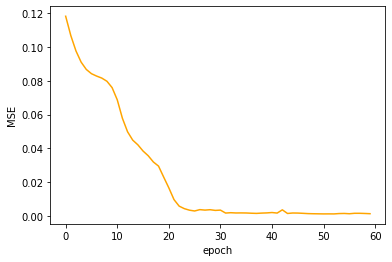

In [ ]:
plt.plot(history.history['val_loss'],color='orange')#wykres procesu uczenia się - wyniki danych testowych
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

In [ ]:
Y_pred=model.predict(batched_data.X_test)#dokonujemy predykcji z wykorzystaniem nauczonego modelu


5/5 [==============================] - 0s 7ms/step


In [ ]:
for i in range(len(batched_data.Y_test)):
            print(Y_pred[i,0],'\t',batched_data.Y_test[i]) #wyświetlenie wartości prognozowanych i faktycznych


0.87931484 	 0.8530223104099113
0.476591 	 0.48238665999881697
0.45032424 	 0.4613641129877881
0.13441576 	 0.08163814010012528
0.13440174 	 0.08262756295471776
0.19152033 	 0.2098141068038953
0.46179658 	 0.44169395645463977
0.42907435 	 0.45442739840939517
0.1348177 	 0.16034565272333262
0.8812047 	 0.8827533917307909
0.21022496 	 0.2224749552339931
0.49935302 	 0.5244559518624271
0.20448221 	 0.22126506315636646
0.14695916 	 0.19305037990611237
0.13558222 	 0.1668306742594116
0.13460524 	 0.1574499776842128
0.42123982 	 0.422822328692725
0.4872952 	 0.5025085095742793
0.13536367 	 0.17270537245855447
0.8809925 	 0.8603569450493904
0.4170277 	 0.4038512209155387
0.15009905 	 0.18992348104771276
0.3604433 	 0.3509224754929638
0.76605684 	 0.6675915619437857
0.20451295 	 0.22019766947899358
0.13460653 	 0.1409524270435077
0.2409087 	 0.26025854049374353
0.30423173 	 0.31413100173686725
0.39748478 	 0.3778170320540741
0.1344358 	 0.10219286217447181
0.881115 	 0.8982453876225351
0.51590